# Info
Name:  

    Explor_fuliou_DARE_single_sol

Purpose:  

    Explore the results of the single solutions calulations from Run_fuliou 
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
  
Needed Files:

    - MOC_1solx_DARE_{vv}_{num}.mat
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-03-28
    Modified: 

# Load the required modules

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [106]:
import matplotlib.cm as cm

In [13]:
import numpy as np

In [2]:
fp = 'C:\\Users\\sleblan2\\Research\\Calipso\\moc\\MOCsolutions_individual\\'

In [5]:
vv = 'v1'

In [77]:
num=19373

# Load the files

In [6]:
s = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=num))

In [7]:
s.keys()

['__version__', 'solutions', '__header__', 'select', '__globals__']

In [11]:
s['solutions'][0,0].dtype.names

('zmax',
 'dF_17lev_24hr',
 'zmin',
 'sza',
 'month',
 'swtoaup_aer_118_24hr',
 'year',
 'cosSZA',
 'swdn17lev_noaer',
 'diffusesfc_aer',
 'swdntoa_noaer',
 'AOD550',
 'swtoaup_aer_118_instant',
 'directsfc_aer',
 'lon',
 'swdn17lev_aer',
 'swup17lev_aer',
 'dF_sfc_24hr',
 'swnet17lev_noaer_118',
 'directsfc_noaer',
 'swnet17lev_aer_118',
 'dF_toa_24hr',
 'asy',
 'swdntoa_aer',
 'swuptoa_noaer',
 'pressure',
 'diffusesfc_noaer',
 'lat',
 'ssa',
 'day',
 'dF_sfc_all',
 'utc',
 'dF_17lev_all',
 'swdnsfc_aer_118_instant',
 'dF_toa_all',
 'swup17lev_noaer',
 'ext',
 'swtoaup_noaer_118_24hr',
 'swuptoa_aer')

# Format results in useable arrays

In [32]:
s['solutions'][0,1]['dF_toa_24hr'][0,0][0,0]

8.4561458333333324

In [33]:
dftoa = np.array([s['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))])

In [35]:
dfsfc = np.array([s['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0]

In [36]:
dftoa.shape

(2944L,)

In [80]:
s['select'][0,0][1]['dF_sfc_24hr'][0][0][0,0]

-32.724895833333335

In [81]:
toa_sel = {}
sfc_sel = {}
i_str = ['m1','s0','p1']
ii = 0
for ie in [-1,0,1]:
    for ia in [-1,0,1]:
        for im in [-1,0,1]:
            form = {'num':num,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
            val = '{e}{a}{s}'.format(**form)
            toa_sel[val] = s['select'][0,0][ii]['dF_toa_24hr'][0][0][0,0]
            sfc_sel[val] = s['select'][0,0][ii]['dF_sfc_24hr'][0][0][0,0]
            ii += 1

In [83]:
sfc_sel.keys()

['m1m1s0',
 'm1p1s0',
 's0s0m1',
 's0m1p1',
 'p1m1s0',
 's0s0s0',
 'm1s0s0',
 'm1m1p1',
 'm1s0p1',
 's0m1m1',
 'p1s0s0',
 'p1s0m1',
 's0p1s0',
 'p1m1m1',
 's0m1s0',
 'p1p1s0',
 'p1p1p1',
 'p1m1p1',
 'm1p1p1',
 'm1s0m1',
 'm1m1m1',
 'm1p1m1',
 's0p1m1',
 'p1s0p1',
 'p1p1m1',
 's0s0p1',
 's0p1p1']

## set it up for the rouces values

In [211]:
len(s['solutions'][0,:])

2944

In [173]:
s['solutions'][0,1]['ssa'][0,0][0]

array([ 0.73926569,  0.74668872,  0.7516906 ,  0.75575138,  0.75819811,
        0.76203758,  0.76939599,  0.77858261,  0.78962751,  0.80374288,
        0.81841109,  0.83227504,  0.84780628,  0.87344249,  0.8995365 ,
        0.91624778,  0.92623792,  0.92886823,  0.92746017,  0.9249966 ,
        0.92028347,  0.91368599,  0.90668119,  0.89786966,  0.88253584,
        0.85840697,  0.82309426,  0.75418288,  0.62086839,  0.34404919])

In [174]:
ssa = np.array([s['solutions'][0,i]['ssa'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

In [175]:
ssa[0]

0.79029904167936471

In [176]:
ext = np.array([s['solutions'][0,i]['ext'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

In [177]:
asy = np.array([s['solutions'][0,i]['asy'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

# Start to plot out results

## plot the source distribution

<IPython.core.display.Javascript object>


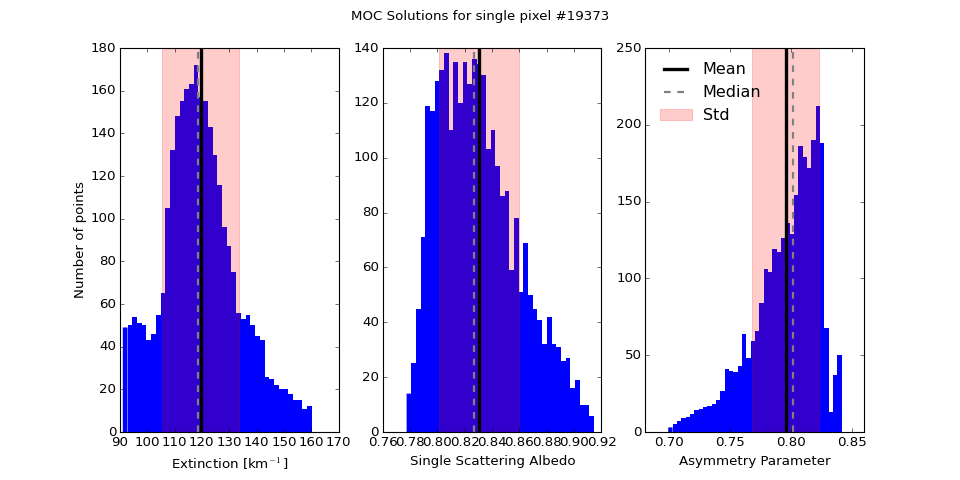

In [208]:
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].hist(ext,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext)-np.std(ext), np.mean(ext)+np.std(ext), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

ax[1].hist(ssa,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa),color='k',lw=3,label='Mean')
ax[1].axvline(np.median(ssa),color='grey',ls='--',lw=2,label='Median')
ax[1].axvspan(np.mean(ssa)-np.std(ssa), np.mean(ssa)+np.std(ssa), alpha=0.2, color='red',label='Std')
ax[1].set_xlabel('Single Scattering Albedo')

ax[2].hist(asy,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy)-np.std(asy), np.mean(asy)+np.std(asy), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num))

plt.legend(loc=2,frameon=False)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_{num}.png'.format(num=num),dpi=600,transparent=True)

## plot the DARE from theses sources

In [37]:
dftoa

array([ 8.25467014,  8.45614583,  8.01206597, ..., -3.38553819,
       -3.28255208, -3.17788194])

<IPython.core.display.Javascript object>


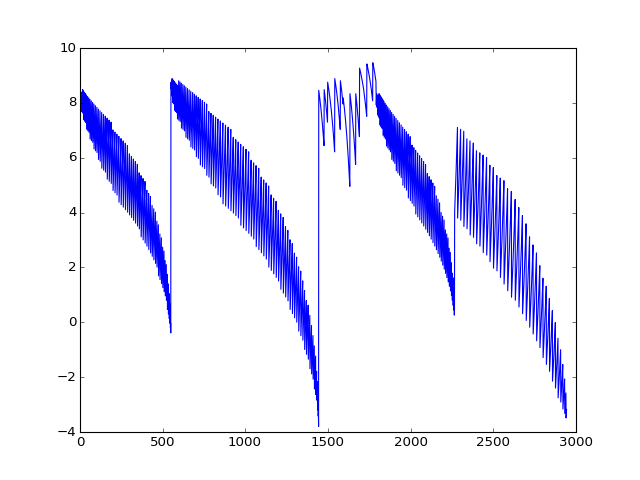

In [38]:
plt.figure()
plt.plot(dftoa)

In [118]:
a = cm.hsv(np.arange(10))

In [125]:
cs = cm.hsv(np.arange(27)/27.0)

In [126]:
for i,k in enumerate(toa_sel.keys()):
    print tuple(cs[i,:])

(1.0, 0.0, 0.0, 1.0)
(1.0, 0.20845609080903196, 0.0, 1.0)
(1.0, 0.41691218161806393, 0.0, 1.0)
(1.0, 0.64853006029476612, 0.0, 1.0)
(1.0, 0.85698615110379794, 0.0, 1.0)
(0.9113959702194997, 1.0, 0.0, 1.0)
(0.70293987941046776, 1.0, 0.0, 1.0)
(0.47132200073376579, 1.0, 0.0, 1.0)
(0.26286590992473358, 1.0, 0.0, 1.0)
(0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0)
(0.0, 1.0, 0.17720733690405541, 1.0)
(0.0, 1.0, 0.40882375639585572, 1.0)
(0.0, 1.0, 0.61727853393847598, 1.0)
(0.0, 1.0, 0.84889495343027632, 1.0)
(0.0, 0.94264990772343771, 1.0, 1.0)
(0.0, 0.7110320290467349, 1.0, 1.0)
(0.0, 0.50257593823770308, 1.0, 1.0)
(0.0, 0.27095805956100094, 1.0, 1.0)
(0.0, 0.062501968751969006, 1.0, 1.0)
(0.16911590992473247, 0.0, 1.0, 1.0)
(0.37757200073376529, 0.0, 1.0, 1.0)
(0.60918987941046776, 0.0, 1.0, 1.0)
(0.81764597021949992, 0.0, 1.0, 1.0)
(0.99558794963206743, 0.0, 0.94632410073586526, 1.0)
(1.0, 0.0, 0.74228006029476601, 1.0)
(1.0, 0.0, 0.51066218161806387, 1.0)
(1.0, 0.0, 0.3022060

<IPython.core.display.Javascript object>


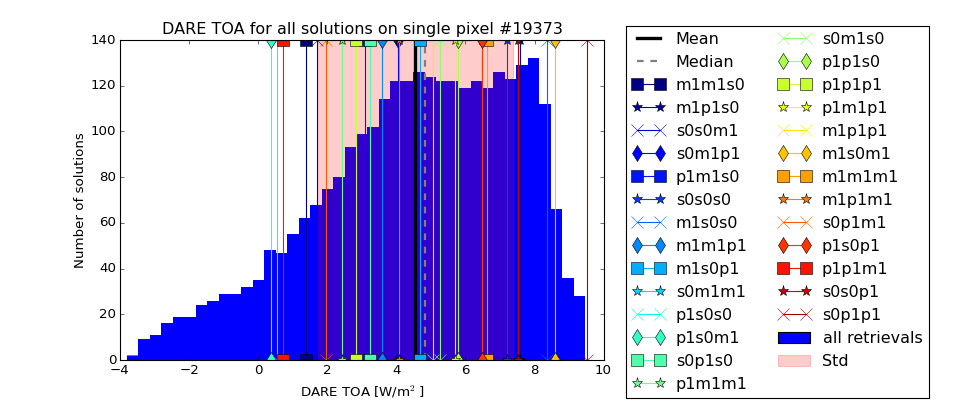

In [209]:
plt.figure(figsize=(12,5))
plt.hist(dftoa,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoa)-np.std(dftoa), np.mean(dftoa)+np.std(dftoa), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


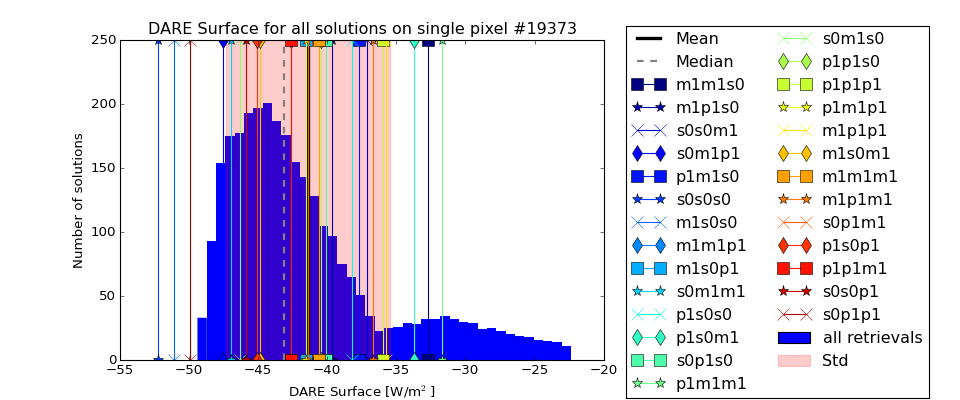

In [210]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_sel.keys()):
    plt.axvline(sfc_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc)-np.std(dfsfc), np.mean(dfsfc)+np.std(dfsfc), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


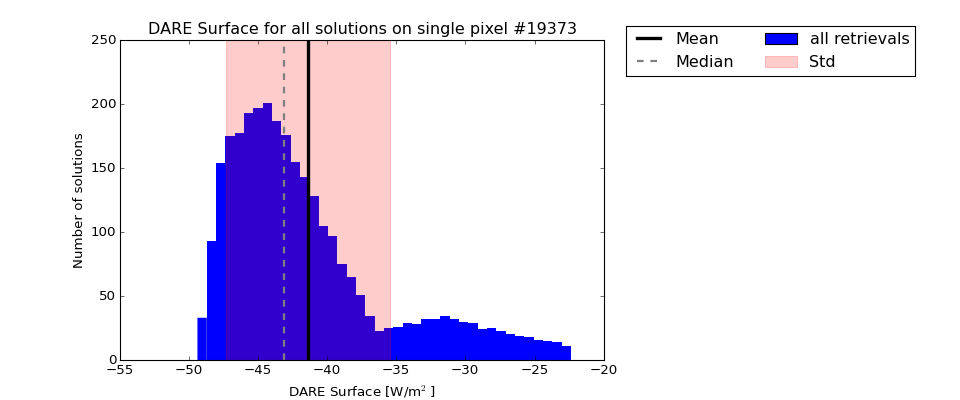

In [243]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
#for i,k in enumerate(sfc_sel.keys()):
#    plt.axvline(sfc_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc)-np.std(dfsfc), np.mean(dfsfc)+np.std(dfsfc), alpha=0.2, color='red',label='Std')
plt.xlim(-55,-20)
plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)
plt.savefig(fp+'plot\\DARE_SFC_{num}_nosup.png'.format(num=num),dpi=600,transparent=True)

# Redo the analysis for number 22134

In [213]:
num2 = 22134

In [214]:
s2 = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=num2))

In [215]:
dftoa2 = np.array([s2['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s2['solutions'][0,:]))])
dfsfc2 = np.array([s2['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s2['solutions'][0,:]))])[:,0,0]

In [216]:
toa_sel2 = {}
sfc_sel2 = {}
i_str = ['m1','s0','p1']
ii = 0
for ie in [-1,0,1]:
    for ia in [-1,0,1]:
        for im in [-1,0,1]:
            form = {'num':num,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
            val = '{e}{a}{s}'.format(**form)
            toa_sel2[val] = s2['select'][0,0][ii]['dF_toa_24hr'][0][0][0,0]
            sfc_sel2[val] = s2['select'][0,0][ii]['dF_sfc_24hr'][0][0][0,0]
            ii += 1

In [217]:
ssa2 = np.array([s2['solutions'][0,i]['ssa'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])
ext2 = np.array([s2['solutions'][0,i]['ext'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])
asy2 = np.array([s2['solutions'][0,i]['asy'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])

<IPython.core.display.Javascript object>


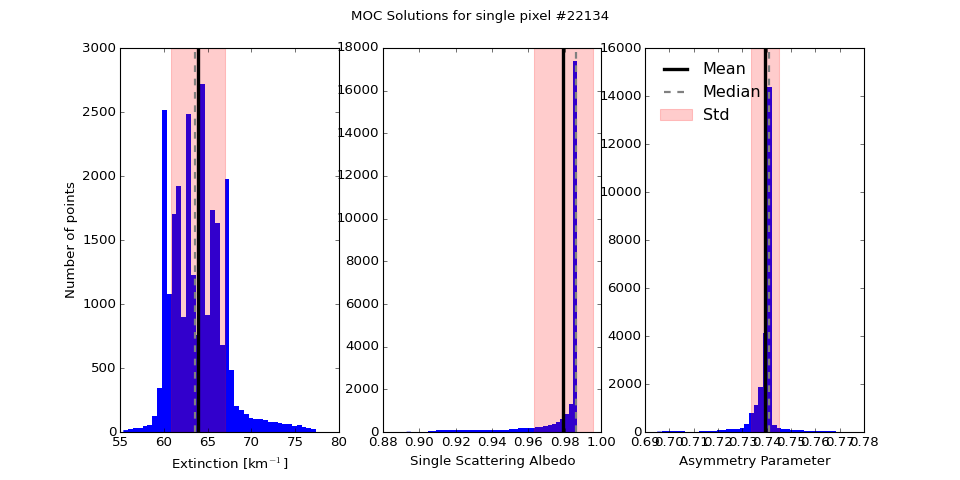

In [220]:
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].hist(ext2,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext2),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext2),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext2)-np.std(ext2), np.mean(ext2)+np.std(ext2), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

ax[1].hist(ssa2,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa2),color='k',lw=3,label='Mean')
ax[1].axvline(np.median(ssa2),color='grey',ls='--',lw=2,label='Median')
ax[1].axvspan(np.mean(ssa2)-np.std(ssa2), np.mean(ssa2)+np.std(ssa2), alpha=0.2, color='red',label='Std')
ax[1].set_xlabel('Single Scattering Albedo')

ax[2].hist(asy2,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy2),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy2),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy2)-np.std(asy2), np.mean(asy2)+np.std(asy2), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num2))

plt.legend(loc=2,frameon=False)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


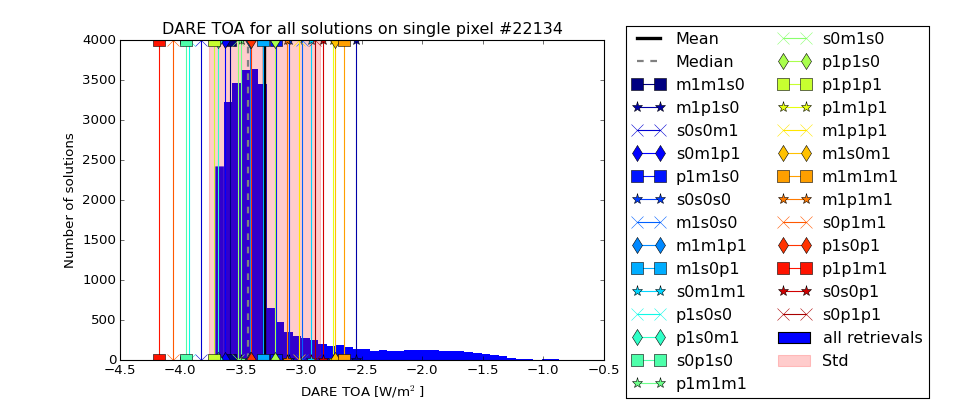

In [221]:
plt.figure(figsize=(12,5))
plt.hist(dftoa2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_sel2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoa2)-np.std(dftoa2), np.mean(dftoa2)+np.std(dftoa2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


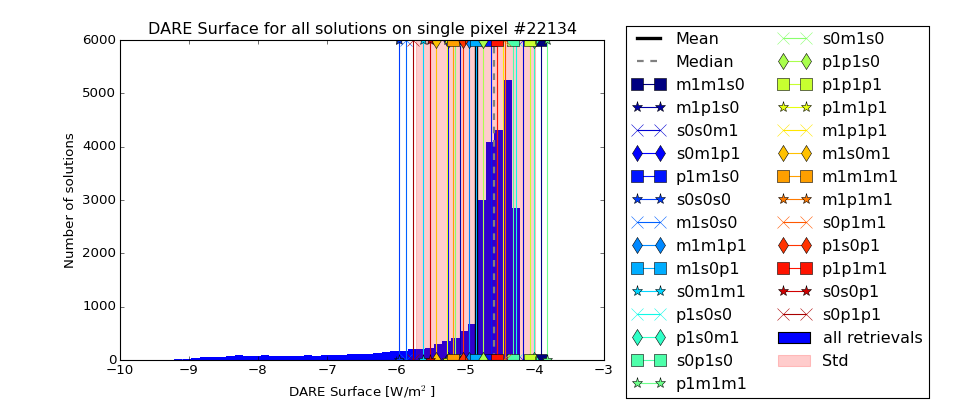

In [222]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_sel2.keys()):
    plt.axvline(sfc_sel2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc2)-np.std(dfsfc2), np.mean(dfsfc2)+np.std(dfsfc2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_{num}.png'.format(num=num2),dpi=600,transparent=True)

In [223]:
len(ext2)

24860

# Print out all the resulting values

In [231]:
print 'TOA {}'.format(num)
print 'Mean:',np.mean(dftoa)
print 'Median',np.median(dftoa)
print 'Mean+std:',np.mean(dftoa)+np.std(dftoa)
print 'Mean-std:',np.mean(dftoa)-np.std(dftoa)
for k in np.sort(toa_sel.keys()):
    print k,toa_sel[k]

TOA 19373
Mean: 4.53364175253
Median 4.84239583333
Mean+std: 7.37597248001
Mean-std: 1.69131102504
m1m1m1 6.63815972222
m1m1p1 3.58342013889
m1m1s0 1.39503472222
m1p1m1 4.07274305556
m1p1p1 5.05875
m1p1s0 7.58371527778
m1s0m1 8.58142361111
m1s0p1 4.68083333333
m1s0s0 8.35876736111
p1m1m1 2.42310763889
p1m1p1 5.69560763889
p1m1s0 3.09024305556
p1p1m1 0.713194444444
p1p1p1 2.8428125
p1p1s0 5.78300347222
p1s0m1 0.371111111111
p1s0p1 6.46670138889
p1s0s0 0.546614583333
s0m1m1 6.47614583333
s0m1p1 4.04737847222
s0m1s0 5.25440972222
s0p1m1 1.974375
s0p1p1 9.51640625
s0p1s0 3.2421875
s0s0m1 1.6925
s0s0p1 7.52685763889
s0s0s0 7.20473958333


In [235]:
print 'TOA {}'.format(num)
print 'Mean:',np.mean(dfsfc)
print 'Median',np.median(dfsfc)
print 'Mean+std:',np.mean(dfsfc)+np.std(dfsfc)
print 'Mean-std:',np.mean(dfsfc)-np.std(dfsfc)
for k in np.sort(toa_sel.keys()):
    print k,toa_sel[k],sfc_sel[k]

TOA 19373
Mean: -41.4133643699
Median -43.0968229167
Mean+std: -35.473165998
Mean-std: -47.3535627417
m1m1m1 6.63815972222 -40.5838020833
m1m1p1 3.58342013889 -42.6557638889
m1m1s0 1.39503472222 -32.7248958333
m1p1m1 4.07274305556 -36.7030902778
m1p1p1 5.05875 -35.7363368056
m1p1s0 7.58371527778 -39.655625
m1s0m1 8.58142361111 -44.8683159722
m1s0p1 4.68083333333 -41.5692534722
m1s0s0 8.35876736111 -51.09734375
p1m1m1 2.42310763889 -31.7183159722
p1m1p1 5.69560763889 -41.5101388889
p1m1s0 3.09024305556 -37.6676909722
p1p1m1 0.713194444444 -42.6344270833
p1p1p1 2.8428125 -35.9614756944
p1p1s0 5.78300347222 -40.4784375
p1s0m1 0.371111111111 -33.7286805556
p1s0p1 6.46670138889 -45.1071701389
p1s0s0 0.546614583333 -38.22890625
s0m1m1 6.47614583333 -46.9563541667
s0m1p1 4.04737847222 -47.5214236111
s0m1s0 5.25440972222 -46.3173611111
s0p1m1 1.974375 -41.3783159722
s0p1p1 9.51640625 -49.9383506944
s0p1s0 3.2421875 -40.1162847222
s0s0m1 1.6925 -37.0974826389
s0s0p1 7.52685763889 -45.9139930556

In [234]:
for k in np.sort(toa_sel.keys()):
    print sfc_sel[k]

-40.5838020833
-42.6557638889
-32.7248958333
-36.7030902778
-35.7363368056
-39.655625
-44.8683159722
-41.5692534722
-51.09734375
-31.7183159722
-41.5101388889
-37.6676909722
-42.6344270833
-35.9614756944
-40.4784375
-33.7286805556
-45.1071701389
-38.22890625
-46.9563541667
-47.5214236111
-46.3173611111
-41.3783159722
-49.9383506944
-40.1162847222
-37.0974826389
-45.9139930556
-52.2517013889


In [237]:
print 'TOA, SFC {}'.format(num2)
print 'Mean:',np.mean(dftoa2),np.mean(dfsfc2)
print 'Median',np.median(dftoa2),np.median(dfsfc2)
print 'Mean+std:',np.mean(dftoa2)+np.std(dftoa2),np.mean(dfsfc2)+np.std(dfsfc2)
print 'Mean-std:',np.mean(dftoa2)-np.std(dftoa2),np.mean(dfsfc2)-np.std(dfsfc2)
for k in np.sort(toa_sel2.keys()):
    print k,toa_sel2[k],sfc_sel2[k]

TOA, SFC 22134
Mean: -3.30813839236 -4.85165741695
Median -3.44208333333 -4.58329861111
Mean+std: -2.84836606576 -3.99506474986
Mean-std: -3.76791071896 -5.70825008405
m1m1m1 -2.64324652778 -5.17269097222
m1m1p1 -3.42291666667 -4.94640625
m1m1s0 -3.59076388889 -3.91128472222
m1p1m1 -3.11534722222 -4.54322916667
m1p1p1 -3.02147569444 -4.45050347222
m1p1s0 -2.55126736111 -5.08175347222
m1s0m1 -2.71817708333 -5.41881944444
m1s0p1 -3.32130208333 -4.84569444444
m1s0s0 -2.99131944444 -5.86008680556
p1m1m1 -3.49517361111 -3.81623263889
p1m1p1 -2.73470486111 -5.26328125
p1m1s0 -3.20875 -4.63612847222
p1p1m1 -4.17770833333 -4.54001736111
p1p1p1 -3.72430555556 -4.06704861111
p1p1s0 -3.21934027778 -4.74449652778
p1s0m1 -3.68631944444 -4.00595486111
p1s0p1 -3.41581597222 -5.03730902778
p1s0s0 -3.93276041667 -4.27369791667
s0m1m1 -2.91729166667 -5.61519097222
s0m1p1 -3.63477430556 -5.25576388889
s0m1s0 -3.52552083333 -5.14626736111
s0p1m1 -4.06519097222 -4.42876736111
s0p1p1 -2.88392361111 -5.75369

In [238]:
for k in np.sort(toa_sel2.keys()):
    print toa_sel2[k]

-2.64324652778
-3.42291666667
-3.59076388889
-3.11534722222
-3.02147569444
-2.55126736111
-2.71817708333
-3.32130208333
-2.99131944444
-3.49517361111
-2.73470486111
-3.20875
-4.17770833333
-3.72430555556
-3.21934027778
-3.68631944444
-3.41581597222
-3.93276041667
-2.91729166667
-3.63477430556
-3.52552083333
-4.06519097222
-2.88392361111
-3.95203125
-3.82852430556
-2.81789930556
-3.09855902778


In [239]:
for k in np.sort(toa_sel2.keys()):
    print sfc_sel2[k]

-5.17269097222
-4.94640625
-3.91128472222
-4.54322916667
-4.45050347222
-5.08175347222
-5.41881944444
-4.84569444444
-5.86008680556
-3.81623263889
-5.26328125
-4.63612847222
-4.54001736111
-4.06704861111
-4.74449652778
-4.00595486111
-5.03730902778
-4.27369791667
-5.61519097222
-5.25576388889
-5.14626736111
-4.42876736111
-5.75369791667
-4.31678819444
-4.17043402778
-5.51685763889
-5.96602430556
